In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from causalgraphicalmodels import CausalGraphicalModel
from IPython.display import Image
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE
from causalnex.structure.notears import from_pandas, from_pandas_lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectFromModel
import networkx as nx

%matplotlib inline

In [39]:
import pygraphviz

In [109]:
data1 = pd.read_csv('../data/df_causal.csv',index_col=False)
data1

,diagnosis,concave points_worst,concave points_se,symmetry_se,radius_se,concavity_mean,smoothness_worst,smoothness_se,area_mean,area_se
0,1,0.2654,0.01587,0.03003,1.0950,0.30010,0.16220,0.006399,1001.0,153.40
1,1,0.1860,0.01340,0.01389,0.5435,0.08690,0.12380,0.005225,1326.0,74.08
2,1,0.2430,0.02058,0.02250,0.7456,0.19740,0.14440,0.006150,1203.0,94.03
3,1,0.2575,0.01867,0.05963,0.4956,0.24140,0.20980,0.009110,386.1,27.23
4,1,0.1625,0.01885,0.01756,0.7572,0.19800,0.13740,0.011490,1297.0,94.44
...,...,...,...,...,...,...,...,...,...,...
564,1,0.2216,0.02454,0.01114,1.1760,0.24390,0.14100,0.010300,1479.0,158.70
565,1,0.1628,0.01678,0.01898,0.7655,0.14400,0.11660,0.005769,1261.0,99.04
566,1,0.1418,0.01557,0.01318,0.4564,0.09251,0.11390,0.005903,858.1,48.55
567,1,0.2650,0.01664,0.02324,0.7260,0.35140,0.16500,0.006522,1265.0,86.22


## Let's split the data into two part

In [110]:
random_df = data1.sample(frac=0.8,random_state=60)
random_df

,diagnosis,concave points_worst,concave points_se,symmetry_se,radius_se,concavity_mean,smoothness_worst,smoothness_se,area_mean,area_se
10,1,0.09975,0.007591,0.01460,0.3795,0.03299,0.1181,0.004029,797.8,40.51
81,0,0.17080,0.013830,0.02134,0.2860,0.11690,0.1536,0.006794,520.0,12.96
378,0,0.10540,0.008356,0.01818,0.1402,0.04249,0.1275,0.005212,580.6,11.35
207,1,0.10960,0.011230,0.02294,0.5858,0.06950,0.1111,0.005038,904.3,68.46
401,0,0.06876,0.005832,0.01096,0.2522,0.02606,0.1374,0.006175,442.7,18.95
...,...,...,...,...,...,...,...,...,...,...
54,1,0.15300,0.009222,0.01095,0.3105,0.05253,0.1389,0.004675,712.8,29.91
444,1,0.15350,0.009753,0.01295,0.2986,0.10900,0.1263,0.004117,990.0,35.77
222,0,0.05575,0.007624,0.02637,0.2467,0.01768,0.1406,0.007899,313.1,15.05
472,0,0.11470,0.008399,0.01148,0.2446,0.05539,0.1065,0.003271,686.9,23.31


In [111]:
data2= random_df[['concave points_worst', 'concave points_se', 'symmetry_se', 'radius_se', 'concavity_mean', 'smoothness_worst', 'smoothness_se', 'area_mean', 'area_se']]

In [112]:
data3= random_df[['diagnosis']]
data4 = pd.concat([data2,data3],axis=1, join="inner")
data4

,concave points_worst,concave points_se,symmetry_se,radius_se,concavity_mean,smoothness_worst,smoothness_se,area_mean,area_se,diagnosis
10,0.09975,0.007591,0.01460,0.3795,0.03299,0.1181,0.004029,797.8,40.51,1
81,0.17080,0.013830,0.02134,0.2860,0.11690,0.1536,0.006794,520.0,12.96,0
378,0.10540,0.008356,0.01818,0.1402,0.04249,0.1275,0.005212,580.6,11.35,0
207,0.10960,0.011230,0.02294,0.5858,0.06950,0.1111,0.005038,904.3,68.46,1
401,0.06876,0.005832,0.01096,0.2522,0.02606,0.1374,0.006175,442.7,18.95,0
...,...,...,...,...,...,...,...,...,...,...
54,0.15300,0.009222,0.01095,0.3105,0.05253,0.1389,0.004675,712.8,29.91,1
444,0.15350,0.009753,0.01295,0.2986,0.10900,0.1263,0.004117,990.0,35.77,1
222,0.05575,0.007624,0.02637,0.2467,0.01768,0.1406,0.007899,313.1,15.05,0
472,0.11470,0.008399,0.01148,0.2446,0.05539,0.1065,0.003271,686.9,23.31,0


C:\Users\hp\anaconda3\lib\site-packages\causalnex\structure\notears.py:411: RuntimeWarning: invalid value encountered in multiply
  obj_grad = loss_grad + (rho * (np.trace(E) - d) + alpha) * E.T * W * 2
C:\Users\hp\anaconda3\lib\site-packages\causalnex\structure\notears.py:440: UserWarning: Failed to converge. Consider increasing max_iter.
  warnings.warn("Failed to converge. Consider increasing max_iter.")
C:\Users\hp\anaconda3\lib\site-packages\pygraphviz\agraph.py:1367: RuntimeWarning: Warning: node 'concave points_worst', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


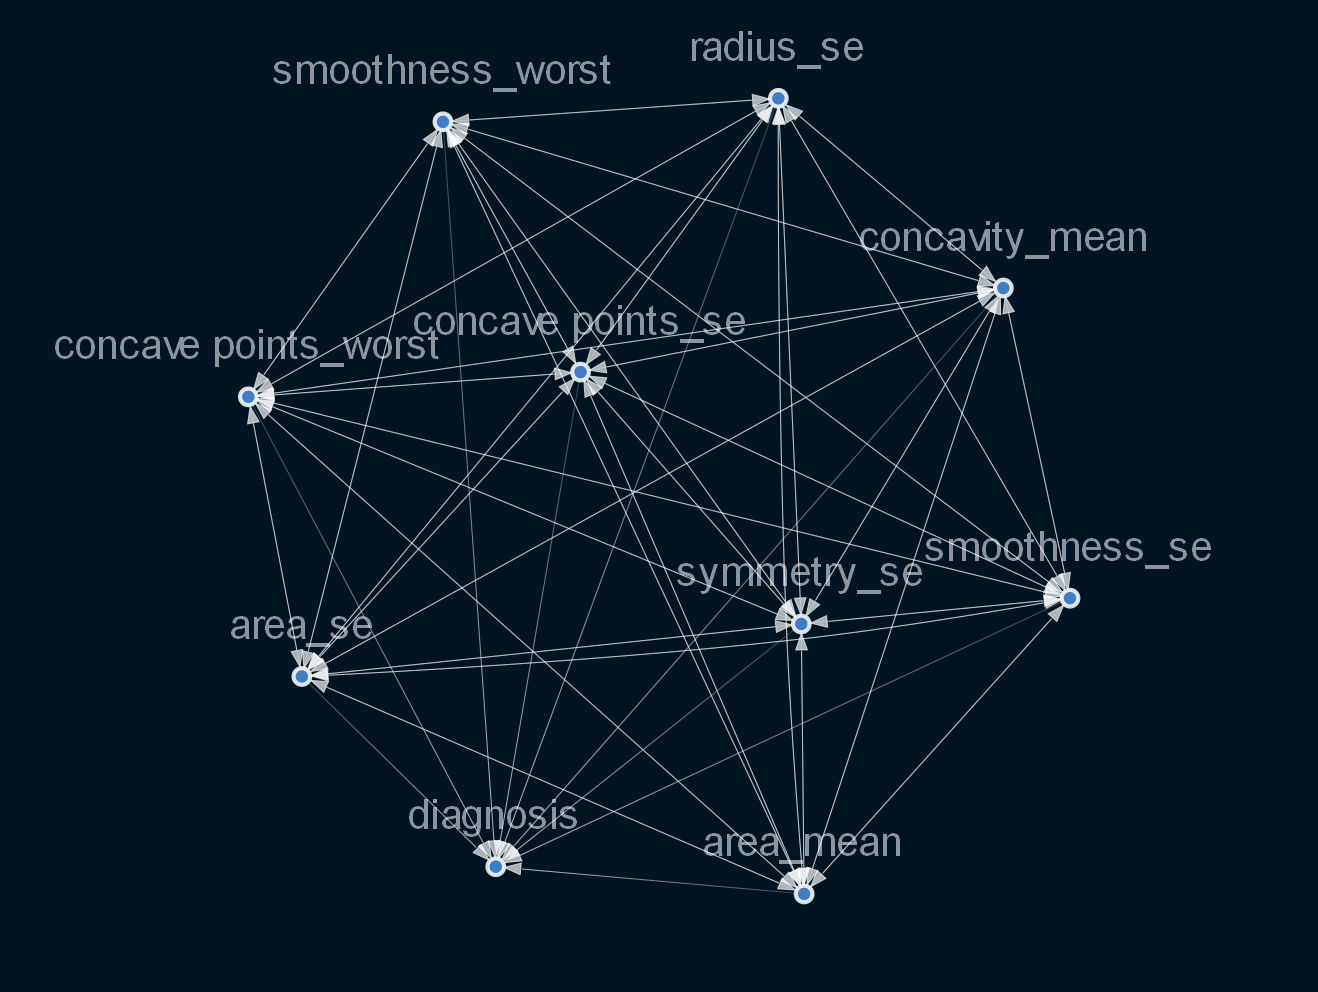

In [113]:

sm = from_pandas(data4, tabu_parent_nodes=['diagnosis'])
viz = plot_structure(
    sm,
    graph_attributes={"scale": "2"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))

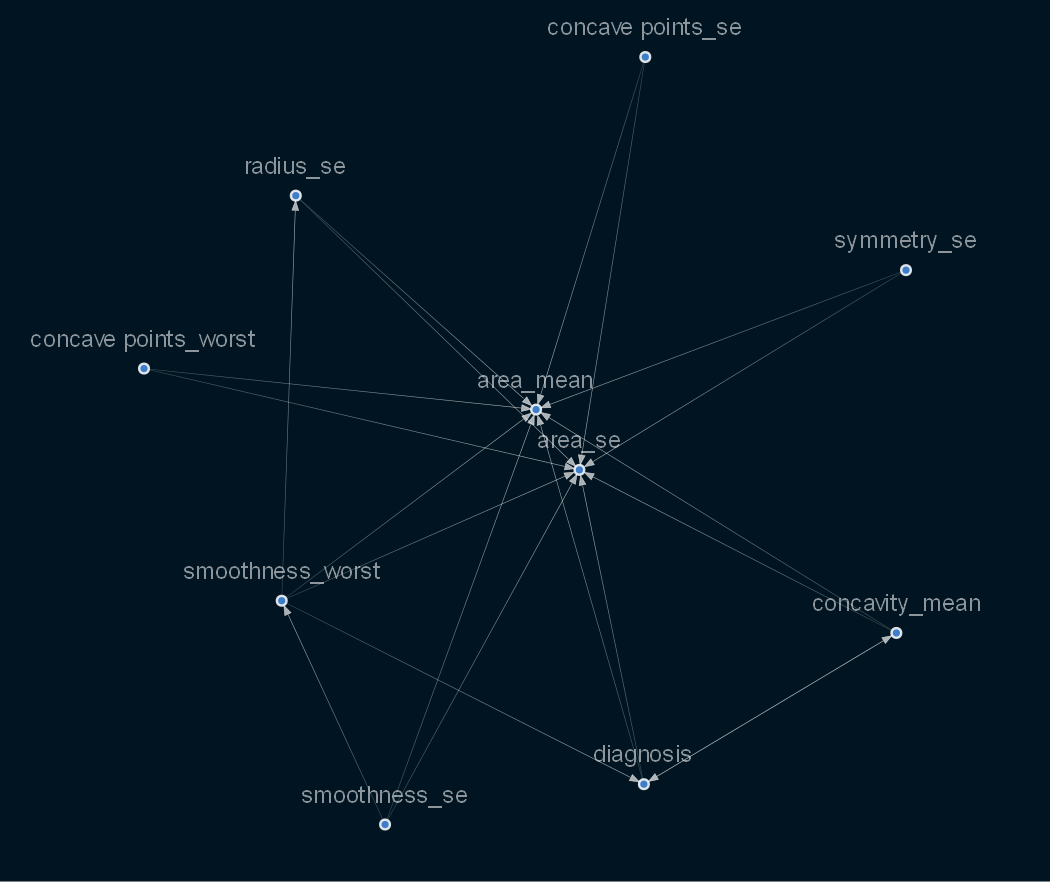

In [126]:
#remove edges with threshold below 0.8
sm.remove_edges_below_threshold(0.8)
viz = plot_structure(
    sm,
    graph_attributes={"scale": "2",'size':3.5},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))

The graph above showed us relationship among  the data training, and here we can notice that concavity mean and smoothness_west have a direct relation with our target feature diagnosis

C:\Users\hp\anaconda3\lib\site-packages\pygraphviz\agraph.py:1367: RuntimeWarning: Warning: node 'concave points_worst', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


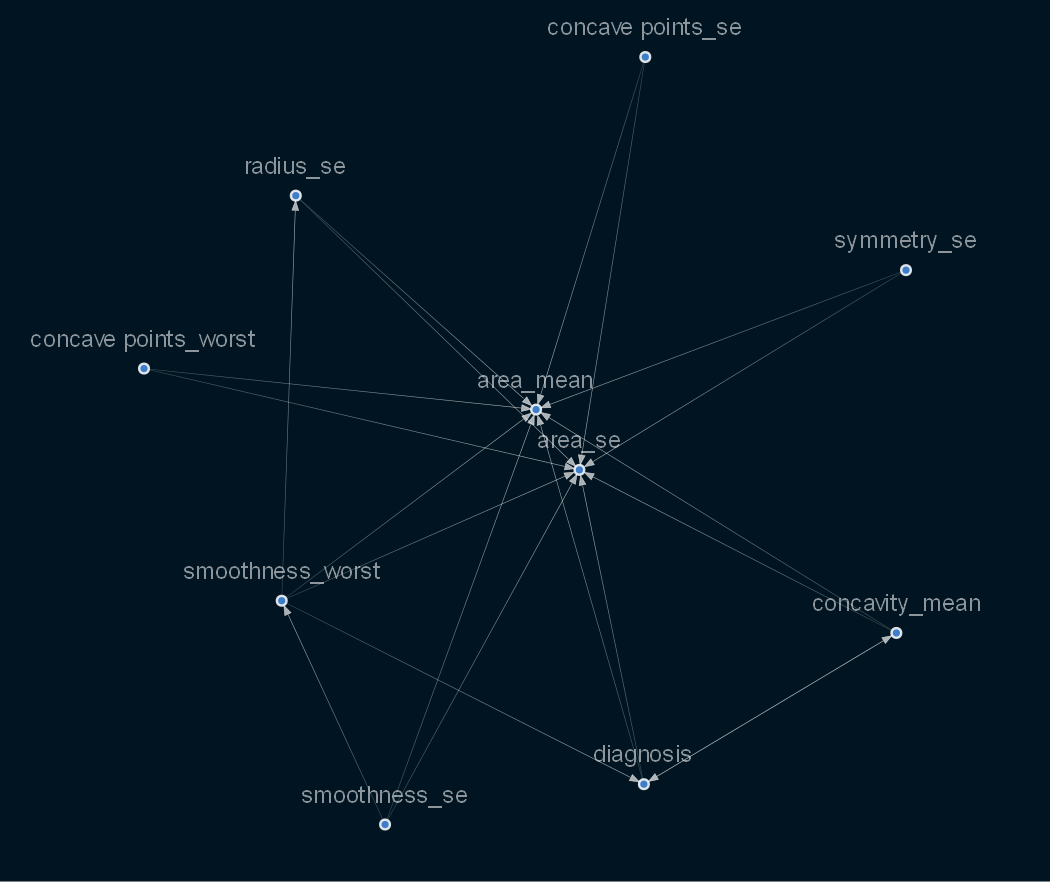

In [119]:

sm = from_pandas(data4, w_threshold=0.8)
viz = plot_structure(
    sm,
    graph_attributes={"scale": "2.0", 'size':3.5},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))

## Let's add constraint to diagnosis without lasso regularization

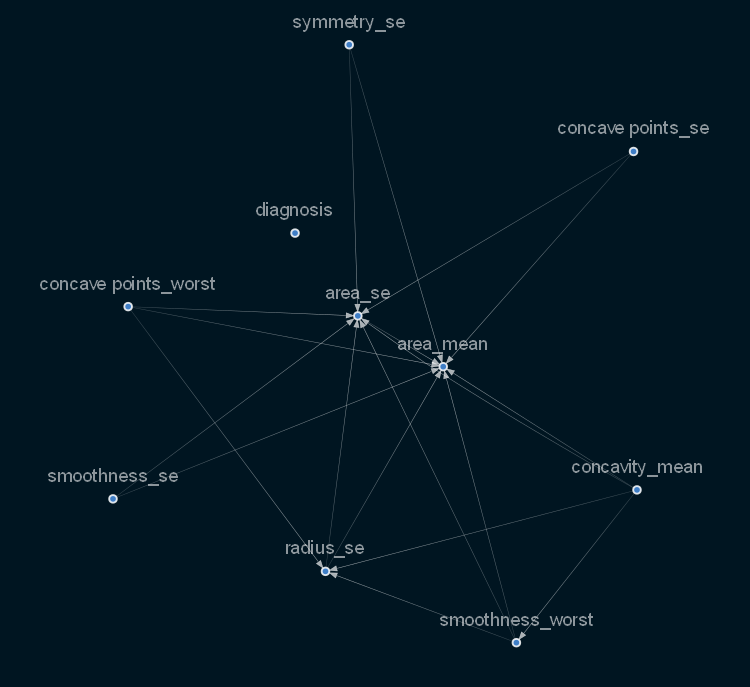

In [127]:

sm_constrained = from_pandas(data4, tabu_parent_nodes=['diagnosis'], w_threshold=0.8)
viz = plot_structure(
    sm_constrained,
    graph_attributes={"scale": "2.0", 'size':2.5},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))

## Constraint on diagnosis column with lasso regularization

C:\Users\hp\anaconda3\lib\site-packages\causalnex\structure\notears.py:518: RuntimeWarning: invalid value encountered in multiply
  + (rho * (np.trace(exp_hdmrd) - d) + alpha) * exp_hdmrd.T * wmat * 2
C:\Users\hp\anaconda3\lib\site-packages\causalnex\structure\notears.py:550: UserWarning: Failed to converge. Consider increasing max_iter.
  warnings.warn("Failed to converge. Consider increasing max_iter.")
C:\Users\hp\anaconda3\lib\site-packages\pygraphviz\agraph.py:1367: RuntimeWarning: Warning: node 'concave points_worst', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


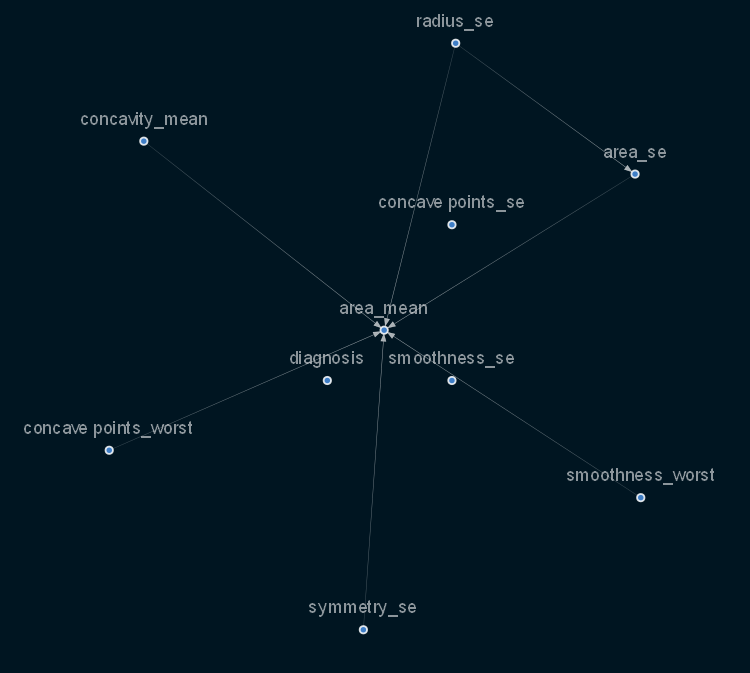

In [128]:


sm_lasso_constrained = from_pandas_lasso(data4, tabu_parent_nodes=['diagnosis'], w_threshold=0.8, beta=0.8)
viz = plot_structure(
    sm_lasso_constrained,
    graph_attributes={"scale": "2.0", 'size':2.5},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))

# Jaccard's similarity index
## Case of  intersection

In [84]:
#similarity between a graph plotted without lasso regularization and one plotted with lasso regularization
def jaccard_similarity(g, h):
    i = set(g).intersection(h)
    return round(len(i) / (len(g) + len(h) - len(i)),3)

jaccard_similarity(sm_constrained.edges(), sm_lasso_constrained.edges())

0.368

It is weak, very wak the result obtained above , which also mean they are means 36.8% similar .

In [101]:

#Let's split the data
df_1 = data1.iloc[:100,:]
df_2 = data1.iloc[:350,:]
df_3 = data1.iloc[:,:]

In [102]:
def Jaccar_score(g, h):    
    i = set(g).intersection(set(h))
    u = set(g).union(set(h))
    return len(i) / float(len(u))

C:\Users\hp\anaconda3\lib\site-packages\causalnex\structure\notears.py:518: RuntimeWarning: invalid value encountered in multiply
  + (rho * (np.trace(exp_hdmrd) - d) + alpha) * exp_hdmrd.T * wmat * 2
C:\Users\hp\anaconda3\lib\site-packages\causalnex\structure\notears.py:550: UserWarning: Failed to converge. Consider increasing max_iter.
  warnings.warn("Failed to converge. Consider increasing max_iter.")
C:\Users\hp\anaconda3\lib\site-packages\pygraphviz\agraph.py:1367: RuntimeWarning: Warning: node 'diagnosis', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


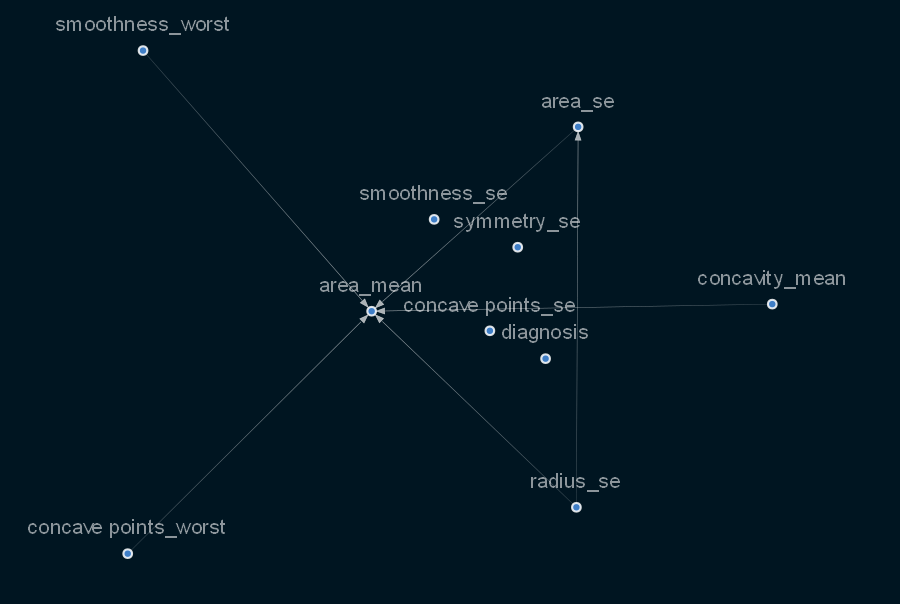

In [138]:

sm_constrained_lasso_df_1 = from_pandas_lasso(df_1, tabu_parent_nodes=["diagnosis"], w_threshold=0.8,beta=0.8)
viz = plot_structure(
    sm_constrained_lasso_df_1,
    graph_attributes={"scale": "2",'size':3},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))

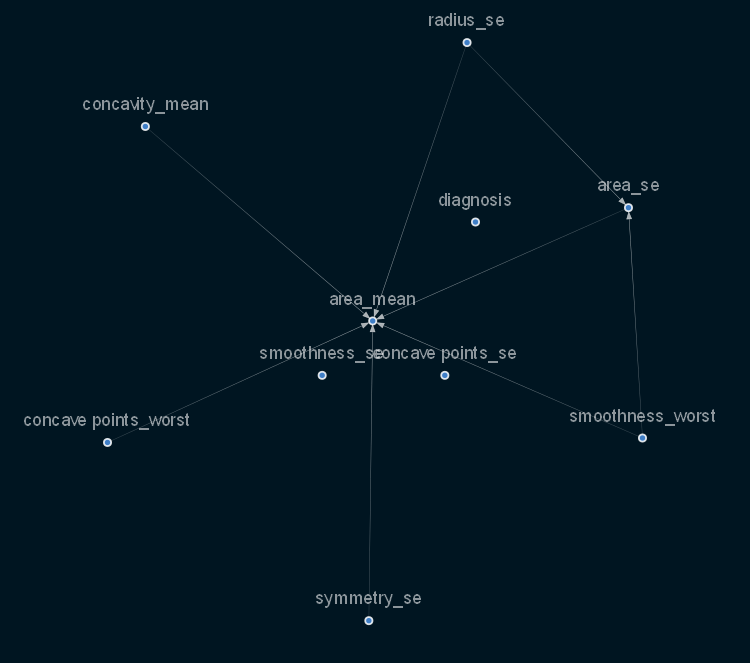

In [104]:

sm_df2 = from_pandas_lasso(df_2, tabu_parent_nodes=['diagnosis'], w_threshold=0.8, beta=0.8)
viz = plot_structure(
    sm_df2,
    graph_attributes={"scale": "2.0", 'size':2.5},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))

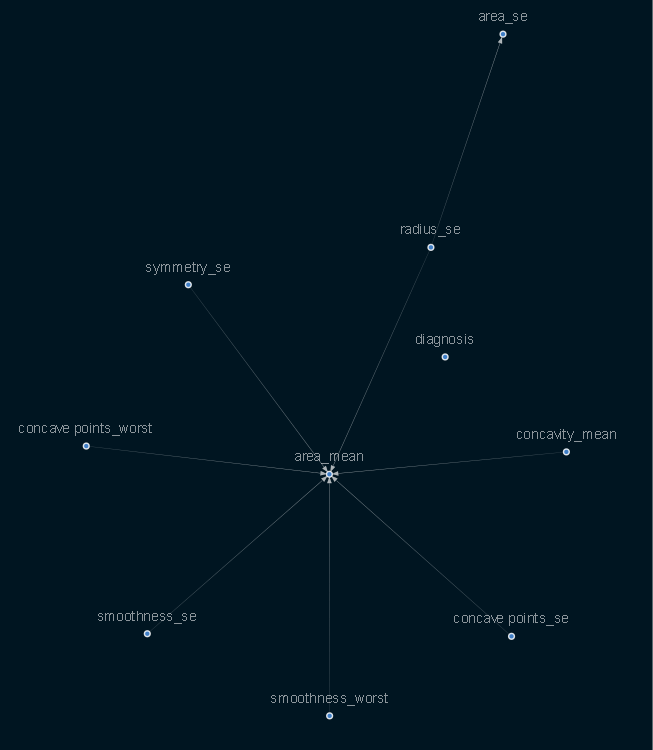

In [105]:
sm_df3 = from_pandas_lasso(df_3, tabu_parent_nodes=['diagnosis'], w_threshold=0.8, beta=0.8)
viz = plot_structure(
    sm_df3,
    graph_attributes={"scale": "2.0", 'size':2.5},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))

## Comparaison

In [137]:
# similarity between df_1 and ground truth(training data)
jaccard_similarity(sm_constrained_lasso_df_1.edges(), sm_lasso_constrained.edges())

0.875

In [139]:
# similarity between df_2 and ground truth(training data)
jaccard_similarity(sm_df2.edges(), sm_lasso_constrained.edges())

0.875

In [140]:
# similarity between df_2 and ground truth(training data)
jaccard_similarity(sm_df3.edges(), sm_lasso_constrained.edges())

0.667